In [1]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

In [14]:
#Load in a directory containing the df_merge csv files
path =  'Z:\\Lab Huttenlocher\\Ashley\\1 Data\\1 Arpc1b\\Migration\\Endothelial crawling experiment\\MERGED files (for composite rose plots)\\4. AKO_AKO'

# find all of the csv files in the directory
# The way this works is to make a dictionary containing all the df_merge files
# Key = a day
# Values = a table of the info in the df_merge file
# all print statements can be deleted for neatness
database = {}
print('Files found in folder: ')
#new_path = path+'\*'
for file in glob.glob(path+'\*'):
    print(file)
    filename = os.path.basename(file)
    name = filename
    print('name:' + str(name))
    # This line assumes the first part of each file is "df_merge" (skip the first 8 characters to name the key)
    print(name[-7:])
    database[name[-7:]] = pd.read_csv(file)
    
print('\n')
print(database)
print(type(database))

Files found in folder: 
Z:\Lab Huttenlocher\Ashley\1 Data\1 Arpc1b\Migration\Endothelial crawling experiment\MERGED files (for composite rose plots)\4. AKO_AKO\df_merge_S5_DAY1
name:df_merge_S5_DAY1
S5_DAY1
Z:\Lab Huttenlocher\Ashley\1 Data\1 Arpc1b\Migration\Endothelial crawling experiment\MERGED files (for composite rose plots)\4. AKO_AKO\df_merge_S5_DAY2
name:df_merge_S5_DAY2
S5_DAY2
Z:\Lab Huttenlocher\Ashley\1 Data\1 Arpc1b\Migration\Endothelial crawling experiment\MERGED files (for composite rose plots)\4. AKO_AKO\df_merge_S5_DAY3
name:df_merge_S5_DAY3
S5_DAY3
Z:\Lab Huttenlocher\Ashley\1 Data\1 Arpc1b\Migration\Endothelial crawling experiment\MERGED files (for composite rose plots)\4. AKO_AKO\df_merge_S6_DAY1
name:df_merge_S6_DAY1
S6_DAY1
Z:\Lab Huttenlocher\Ashley\1 Data\1 Arpc1b\Migration\Endothelial crawling experiment\MERGED files (for composite rose plots)\4. AKO_AKO\df_merge_S6_DAY2
name:df_merge_S6_DAY2
S6_DAY2
Z:\Lab Huttenlocher\Ashley\1 Data\1 Arpc1b\Migration\Endothel

In [15]:
database

{'S5_DAY1':       Unnamed: 0  Track_n  Slice_n    X    Y  Distance  Velocity  Ref_X  \
 0              0       45        1  212  909    -1.000    -1.000    212   
 1              1       45        2  201  905    14.865    14.865    212   
 2              2       45        3  205  913    11.359    11.359    212   
 3              3       45        4  197  910    10.851    10.851    212   
 4              4       45        5  202  910     6.350     6.350    212   
 ...          ...      ...      ...  ...  ...       ...       ...    ...   
 2452        2452       65      117  578  638     2.840     2.840    564   
 2453        2453       65      118  581  633     7.405     7.405    564   
 2454        2454       65      119  584  628     7.405     7.405    564   
 2455        2455       65      120  586  625     4.579     4.579    564   
 2456        2456       65      121  588  622     4.579     4.579    564   
 
       Ref_Y  Norm_x  Norm_y  
 0       909       0       0  
 1       909 

In [17]:
#SPLIT OUT DDATABASE
#Group coordinates by the track to which they belong
s1_df=database['S5_DAY1'].groupby('Track_n')
s2_df=database['S6_DAY1'].groupby('Track_n')
s3_df=database['S5_DAY2'].groupby('Track_n')
s4_df=database['S6_DAY2'].groupby('Track_n')
s5_df=database['S5_DAY3'].groupby('Track_n')
s6_df=database['S6_DAY3'].groupby('Track_n')
#One graph for all the tracks, separated into the quadrants where I tracked them
#fig,ax = plt.subplots()
#for ID, group in s1_df:
    #ax = s1_df.plot(group.X,group.Y)

#s1_df

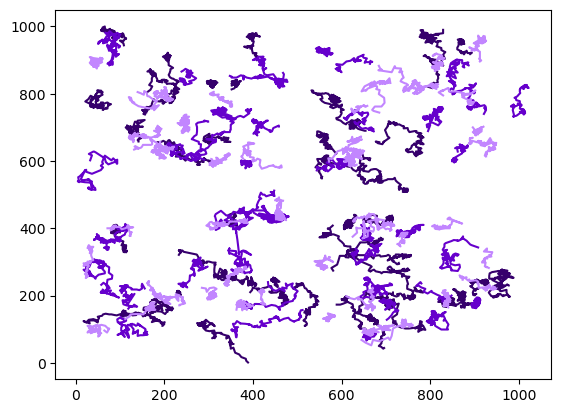

In [18]:
#ALL TRACKS PLOT
#code these for which replicate/day
#also this isn't including all the tracks from both days just one (has 20 tracks)
fig,ax = plt.subplots()

# Using these lists of hex code strings to keep the tracks looking nice and consistent
# I used Prism to find all the RGB colors and then used this website to find the hex codes from it: 
# https://color.adobe.com/create/color-wheel
# but then I ended up just using the colors in the purple family so it was all consistent

colors_black=["#000000","#747474","#AAAAAA"]
colors_teal=["#045768","#0992AE","#61DDF8"]
colors_purple=["#36006C","#6600CC","#C286FF"]
colors_pink=["#98054B","#F8328F","#FB88BE"]

for ID,group in s1_df:
    ax.plot(group.X,group.Y,label="Day 1",color=colors_purple[0])
for ID,group in s2_df:
    ax.plot(group.X,group.Y,label="Day 1",color=colors_purple[0])
for ID,group in s3_df:
    ax.plot(group.X,group.Y,label="Day 2",color=colors_purple[1])
for ID,group in s4_df:
    ax.plot(group.X,group.Y,label="Day 2",color=colors_purple[1])
for ID,group in s5_df:
    ax.plot(group.X,group.Y,label="Day 3",color=colors_purple[2])
for ID,group in s6_df:
    ax.plot(group.X,group.Y,label="Day 3",color=colors_purple[2])

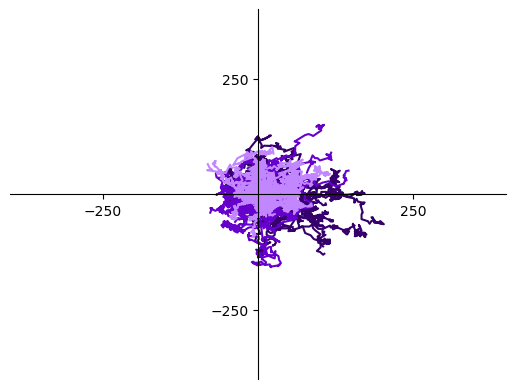

In [19]:
#Plot the normalized data

#set up figure axes and limits
fig,ax = plt.subplots()
plt.xlim(-400,400)
plt.ylim(-400,400)


#Put axes in the middle of the figure
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

#ax.set_yticklabels([])
#ax.set_xticklabels([])
#ax.xaxis.set_major_locator(MultipleLocator(125))
#ax.yaxis.set_major_locator(MultipleLocator(125))
ax.set_xticks([-250,250])
ax.set_yticks([-250,250])
#ax.set_title(position_title)
#ax.set_xticks([])
#ax.set_yticks([])

#for key,value in database.items():
    #print(key)
    #print(value)
    #tracks = value.groupby('Track_n')
    #print(tracks)
    #ax.plot(group.Norm_x,group.Norm_y)
#Plot based on ID of Track_n
#for ID,group in tracks_norm:
    #ax.plot(group.Norm_x,group.Norm_y)
    

    
#for ID,group in s1_df:
 #   ax.plot(group.Norm_x,group.Norm_y,label="Day 1",color=colors_AKO_WT[0])
#for ID,group in s2_df:
 #   ax.plot(group.Norm_x,group.Norm_y,label="Day 2",color=colors_AKO_WT[1])
    
for ID,group in s1_df:
    ax.plot(group.Norm_x,group.Norm_y,label="Day 1",color=colors_purple[0])
for ID,group in s2_df:
    ax.plot(group.Norm_x,group.Norm_y,label="Day 1",color=colors_purple[0])
for ID,group in s3_df:
    ax.plot(group.Norm_x,group.Norm_y,label="Day 2",color=colors_purple[1])
for ID,group in s4_df:
    ax.plot(group.Norm_x,group.Norm_y,label="Day 2",color=colors_purple[1])
for ID,group in s5_df:
    ax.plot(group.Norm_x,group.Norm_y,label="Day 3",color=colors_purple[2])
for ID,group in s6_df:
    ax.plot(group.Norm_x,group.Norm_y,label="Day 3",color=colors_purple[2])
#for ID,group in s3_df:
 #   ax.plot(group.Norm_x,group.Norm_y,label="Day 3",colors_AKO_WT[2])